In [181]:
import pandas as pd
dataset=pd.read_csv("C:/Users/Harshini/Downloads/train_clean.csv")
df=pd.DataFrame(dataset)
df
 

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,NaN,S,13.0000,"Montvila, Rev. Juozas",0,887,2,male,0,0.0,211536,Rev,0
887,19.0,B42,S,30.0000,"Graham, Miss. Margaret Edith",0,888,1,female,0,1.0,112053,Miss,0
888,22.0,NaN,S,23.4500,"Johnston, Miss. Catherine Helen ""Carrie""",2,889,3,female,1,0.0,W./C. 6607,Miss,3
889,26.0,C148,C,30.0000,"Behr, Mr. Karl Howell",0,890,1,male,0,1.0,111369,Mr,0


### Q1. Select the information of the people who paid the top 10 highest fares and state your observation ?

In [182]:
df.sort_values('Fare',ascending=False).iloc[0:10]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
258,35.0,NaN,C,512.3292,"Ward, Miss. Anna",0,259,1,female,0,1.0,PC 17755,Miss,0
737,35.0,B101,C,512.3292,"Lesurer, Mr. Gustave J",0,738,1,male,0,1.0,PC 17755,Mr,0
679,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,680,1,male,0,1.0,PC 17755,Mr,1
88,23.0,C23 C25 C27,S,263.0000,"Fortune, Miss. Mabel Helen",2,89,1,female,3,1.0,19950,Miss,5
27,19.0,C23 C25 C27,S,263.0000,"Fortune, Mr. Charles Alexander",2,28,1,male,3,0.0,19950,Mr,5
341,24.0,C23 C25 C27,S,263.0000,"Fortune, Miss. Alice Elizabeth",2,342,1,female,3,1.0,19950,Miss,5
438,64.0,C23 C25 C27,S,263.0000,"Fortune, Mr. Mark",4,439,1,male,1,0.0,19950,Mr,5
311,18.0,B57 B59 B63 B66,C,262.3750,"Ryerson, Miss. Emily Borie",2,312,1,female,2,1.0,PC 17608,Miss,4
742,21.0,B57 B59 B63 B66,C,262.3750,"Ryerson, Miss. Susan Parker ""Suzette""",2,743,1,female,2,1.0,PC 17608,Miss,4
118,24.0,B58 B60,C,247.5208,"Baxter, Mr. Quigg Edmond",1,119,1,male,0,0.0,PC 17558,Mr,1


### Q2. What percentage of females from the 1st class survived?

In [183]:
fsurvived=len(df.loc[(df["Sex"]=="female")& (df["Pclass"]==1) & (df["Survived"]==1.0)])
ftotal=len(df.loc[(df["Sex"]=="female")& (df["Pclass"]==1)]) 
survived= fsurvived/ftotal*100
print(survived)


96.80851063829788


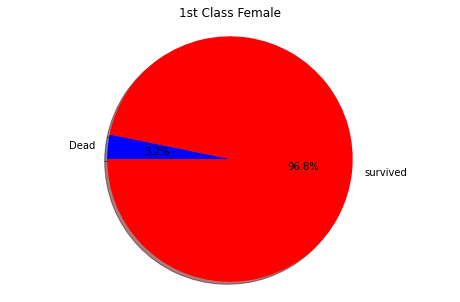

In [184]:
#data to plot
import matplotlib.pyplot as plt
labels = ['survived', 'Dead']
sizes = [survived,100-survived]
colors = ['r', 'b']
plt.pie(sizes,  labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180 )
plt.title("1st Class Female" )
plt.axis('equal')
plt.show()

### Q3. Build a ensemle learning model using bagging technique ?

In [185]:
df.isnull().sum()

Age              0
Cabin          687
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived         0
Ticket           0
Title            0
Family_Size      0
dtype: int64

In [186]:
x= df.drop(["Survived"], axis=1)
y=df.iloc[:,10]

In [187]:
dummies= pd.get_dummies(df , drop_first=True)

In [188]:
y = dummies['Survived']
x = dummies.drop(['Survived'],axis = 1)

In [2]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


NameError: name 'x' is not defined

In [190]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaler.fit_transform(x)



array([[0.27117366, 0.01415106, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.4722292 , 0.13913574, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.32143755, 0.01546857, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.27117366, 0.04577135, 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.32143755, 0.0585561 , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.39683338, 0.01512699, 0.        , ..., 1.        , 0.        ,
        0.        ]])

In [1]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=10))
model.fit(x_train, y_train)

NameError: name 'x_train' is not defined

In [192]:
y_pred=model.predict(x_test)

In [193]:
from sklearn import metrics
bagging_score = metrics.roc_auc_score(y_pred, y_test)
print(bagging_score)

0.8375533049040511


In [194]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [195]:
y_pred_svc=svc.predict(x_test)

In [214]:
from sklearn import metrics
bagging_score_svc = metrics.roc_auc_score(y_pred_svc, y_test)
print(bagging_score_svc)

0.6310211946050096


### Q4. What is area under the roc curve and plot it?

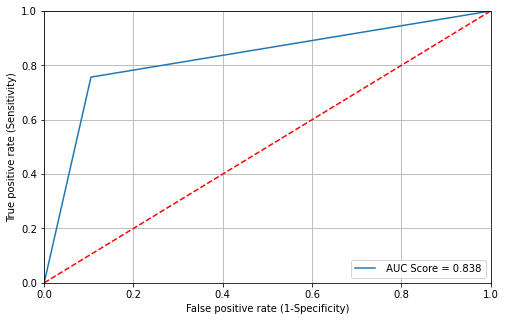

In [197]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.patches as mpatches

plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr,tpr,label=' AUC Score = %0.3f'%(bagging_score))


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])


plt.plot([0, 1], [0, 1],'r--')


plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

plt.legend(loc='lower right')

plt.grid(True)

### Q5. Build a model using AdaBoost and compare it's performance with above model ?

In [207]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(random_state=10)
adaboost.fit(x_train, y_train)



AdaBoostClassifier(random_state=10)

In [210]:
# predict the values
y_pred_adaboost  = adaboost.predict(x_test)

In [211]:
adaboost_score = metrics.roc_auc_score(y_test, y_pred_adaboost)

In [215]:
df = pd.DataFrame()
df['Model'] = ['Bagging','AdaBoost']
df['AUC roc curve'] = [bagging_score,adaboost_score]
df

,Model,AUC roc curve
0,Bagging,0.837553
1,AdaBoost,0.804955
